# Image Analysis with the Computer Vision Service

*Computer Vision* is a branch of artificial intelligence (AI) that explores the development of AI systems that can "see" the world, either in real-time through a camera or by analyzing images and video. This is made possible by the fact that digital images are essentially just arrays of numeric pixel values, and we can use those pixel values as *features* to train machine learning models that can classify images, detect discrete objects in an image, and even generate text-based summaries of a photographs.

<p style='text-align:center'><img src='./images/computer_vision.jpg' alt='A robot with glasses'/></p>

## Use the Computer Vision Cognitive Service

Microsoft Azure includes a number of *cognitive services* that encapsulate common AI functions, including some that can help you build computer vision solutions.

The *Computer Vision* cognitive service provides an obvious starting point for our exploration of computer vision in Azure. It uses pre-trained machine learning models to analyze images and extract information about them.

For example, suppose Northwind Traders has decided to implement a "smart store", in which AI services monitor the store to identify customers requiring assistance, and direct employees to help them. By using the Computer Vision service, images taken by cameras throughout the store can be analyzed to provide meaningful descriptions of what they depict.

Let's start by creating a **Cognitive Services** resource in your Azure subscription:

1. In another browser tab, open the Azure portal at https://portal.azure.com, signing in with your Microsoft account.
2. Click the **&#65291;Create a resource** button, search for *Cognitive Services*, and create a **Cognitive Services** resource with the following settings:
    - **Name**: *Enter a unique name*.
    - **Subscription**: *Your Azure subscription*.
    - **Location**: *Choose any available region*:
    - **Pricing tier**: S0
    - **Resource group**: *Create a resource group with a unique name*.
3. Wait for deployment to complete. Then go to your cognitive services resource, and on the **Quick start** page, note the keys and endpoint. You will need these to connect to your cognitive services resource from client applications.
4. Copy the **Key1** for your resource and paste it in the code below, replacing **YOUR_COG_KEY**.
5. Copy the **endpoint** for your resource and and paste it in the code below, replacing **YOUR_COG_ENDPOINT**.
6. Run the code in the cell below by clicking its green <span style="color:green">&#9655</span> button (at the top left of the cell).

In [1]:
cog_key = 'YOUR_COG_KEY'
cog_endpoint = 'YOUR_COG_ENDPOINT'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://eastus.api.cognitive.microsoft.com/ using key e6dcacc9cd5744438d67815c74484b84


Now that you've set up the key and endpoint, you can use the custom vision service to analyze an image.

Run the following cell to get a description for an image in the */data/vision/image1.jpg* file.

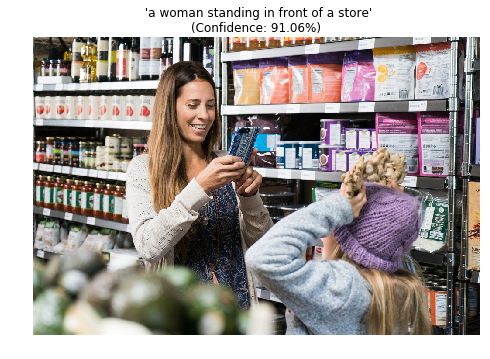

In [33]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from helper_scripts import vision
import os
%matplotlib inline

# Get the path to an image file
image_path = os.path.join('data', 'vision', 'store_cam1.jpg')

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Get a description from the computer vision service
image_stream = open(image_path, "rb")
description = computervision_client.describe_image_in_stream(image_stream)

# Display image and caption (code in helper_scripts/vision.py)
vision.show_image_caption(image_path, description)


That seems reasonably accurate.

Let's try another image.

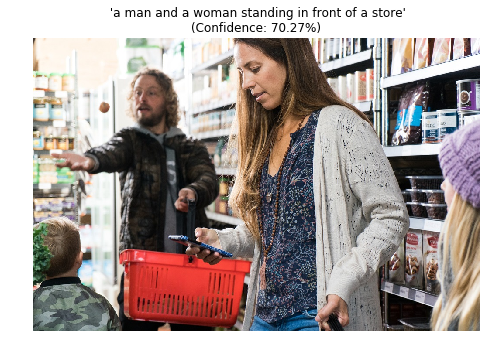

In [34]:
# Get the path to an image file
image_path = os.path.join('data', 'vision', 'store_cam2.jpg')

# Get a description from the computer vision service
image_stream = open(image_path, "rb")
description = computervision_client.describe_image_in_stream(image_stream)

show_image_caption(image_path, description)


Again, the suggested caption seems to be pretty accurate.

Suppose you wanted to archive the image, and add relevant tags to help you search for it. The Computer Vision service can suggest tags that you can associate with the image.

In [27]:
for tag in description.tags:
    print(tag)

person
building
woman
standing
food
man
store
looking
items
bag
luggage
people
table
suitcase
holding
filled
young
street
sale
counter
kitchen
walking
city
group
cake
display
bus
produce
room


## Learn More

The Computer Vision cognitive service offers a lot more functionality than generating image descriptions, including:

- Identifying celebrities or well-known landmarks in images.
- Detecting faces in an image (though it's worth noting that you can analyze faces in more detail by using the separate **Face** service)
- Detecting brand logos in an image.
- Performing optical character recognition (OCR) to read text in an image.
- Detect adult content in an image.

To learn more about the Computer Vision cognitive service, see the [Computer Vision documentation](https://docs.microsoft.com/azure/cognitive-services/computer-vision/)
